In [10]:
import pandas as pd
from sklearn import preprocessing

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [6]:
etf_data = pd.read_csv('ETFs.csv')
stock_data = pd.read_csv('stocks.csv')

stock_data_new = stock_data[["trades","price","ADV_3months_lvl"]]
etf_data_new = etf_data[["trades","price","ADV_3months"]]



In [7]:
#clean
stock_data_new.dropna
etf_data_new.dropna

X_stocks = stock_data_new.iloc[:,1:4].values
X_etfs = etf_data_new.iloc[:,1:4].values ##returns a numpy array for the three columns: price, ADV and trades.

min_max_scaler = preprocessing.MinMaxScaler()

#scale
X_stocks_scaled = min_max_scaler.fit_transform(X_stocks)
X_stocks_df = pd.DataFrame(X_stocks_scaled)
X_etfs_scaled = min_max_scaler.fit_transform(X_etfs)
X_etfs_df = pd.DataFrame(X_etfs_scaled)

array([[0.18200478, 1.        ],
       [0.7008624 , 0.34648596],
       [0.02874104, 1.        ],
       ...,
       [0.00206951, 0.00267043],
       [0.01134326, 0.        ],
       [0.00271082, 0.        ]])

#### Hierarchichal clustering

#### Dendograms

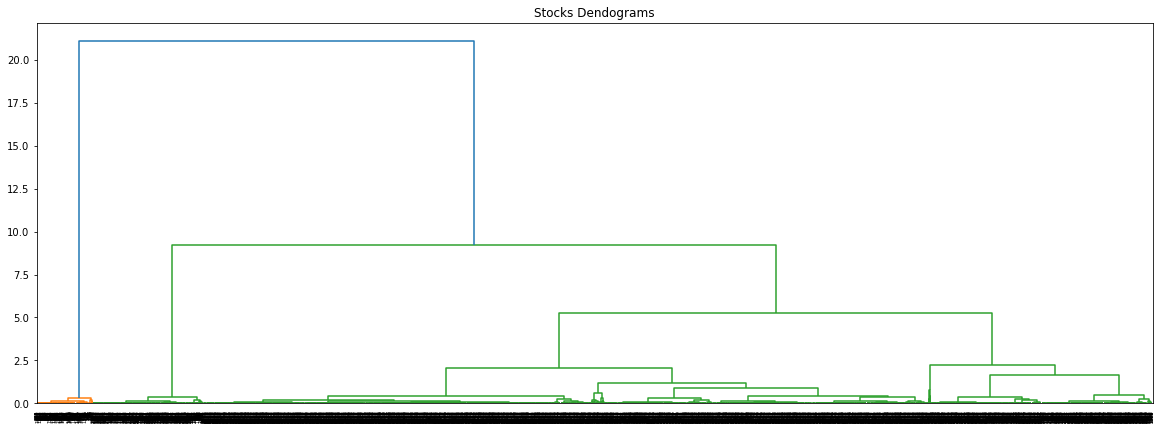

In [15]:
plt.figure(figsize=(20, 7))
plt.title("Stocks Dendograms")
stock_dend = shc.dendrogram(shc.linkage(X_stocks_df.values, method='ward'))

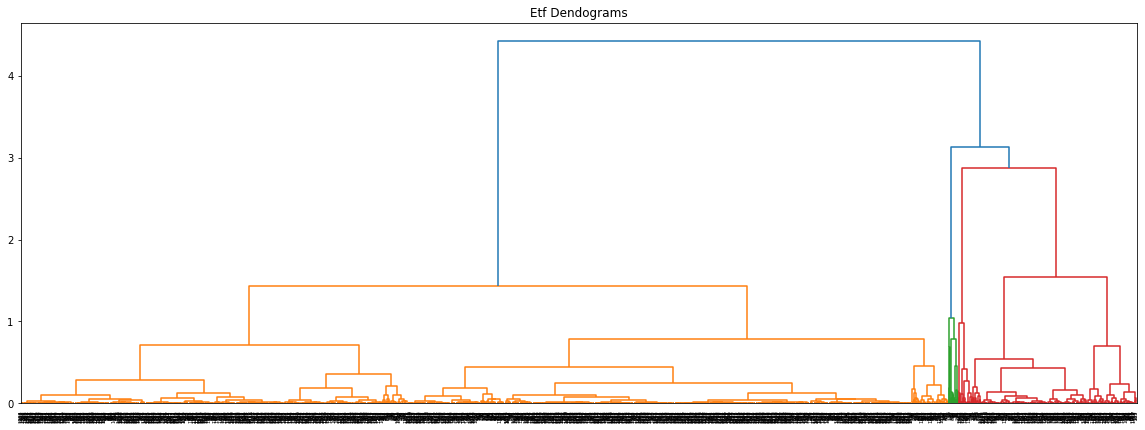

In [16]:
plt.figure(figsize=(20, 7))
plt.title("Etf Dendograms")
etfs_dend = shc.dendrogram(shc.linkage(X_etfs_df.values, method='ward'))

##### using 4 clusters for stocks

In [33]:
from sklearn.cluster import AgglomerativeClustering

stocks_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
stocks_cluster.fit_predict(X_stocks_df.values)

array([3, 4, 3, ..., 0, 0, 0])

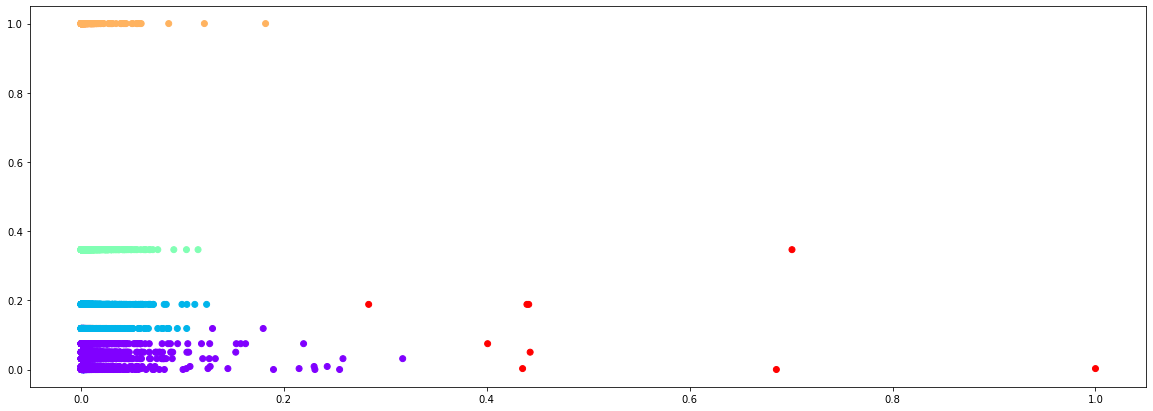

In [34]:
plt.figure(figsize=(20, 7))
plt.scatter(X_stocks_df.values[:,0], X_stocks_df.values[:,1], c=stocks_cluster.labels_, cmap='rainbow')

##### using 4 clusters for etfs

In [35]:

etfs_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
etfs_cluster.fit_predict(X_etfs_df.values)

array([1, 3, 1, ..., 1, 1, 1])

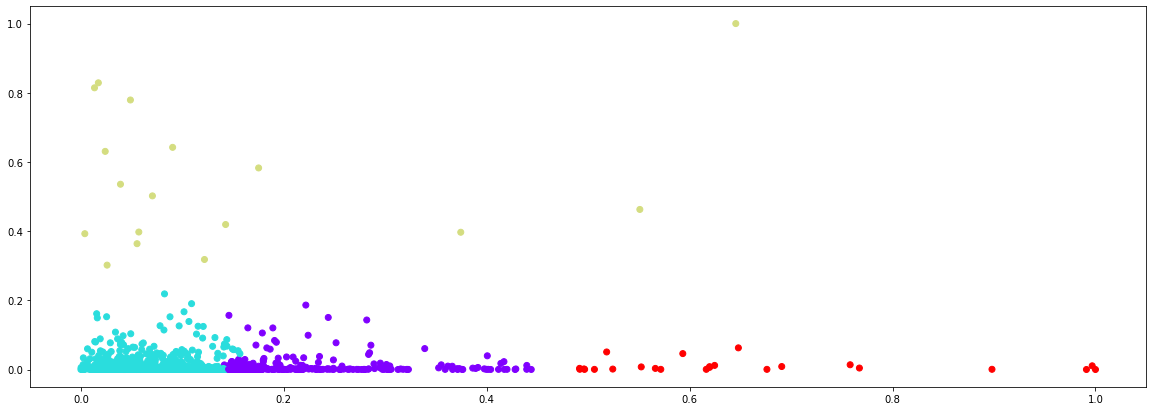

In [36]:
plt.figure(figsize=(20, 7))
plt.scatter(X_etfs_df.values[:,0],  X_etfs_df.values[:,1], c=etfs_cluster.labels_, cmap='rainbow')

#####j